# Zbiór danych v2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from utils import load_jsonl

In [2]:
DATA_DIR = '../data/v2/'

In [3]:
artists_df = load_jsonl(DATA_DIR + 'artists.jsonl')
tracks_df = load_jsonl(DATA_DIR + 'tracks.jsonl')
users_df = load_jsonl(DATA_DIR + 'users.jsonl')
sessions_df = load_jsonl(DATA_DIR + 'sessions.jsonl')
track_storage_df = load_jsonl(DATA_DIR + 'track_storage.jsonl')

## Tabela artists

In [4]:
artists_df.head()

,id,name,genres
0,72578usTM6Cj5qWsi471Nc,Raghu Dixit,"[filmi, indian folk, indian rock, kannada pop]"
1,7b6Ui7JVaBDEfZB9k6nHL0,The Local Train,"[desi pop, hindi indie, indian indie, indian r..."
2,5wJ1H6ud777odtZl5gG507,Vishal Mishra,"[desi pop, modern bollywood]"
3,0n4a5imdLBN24fIrBWoqrv,Because,"[opm, pinoy hip hop, pinoy r&b, pinoy trap, ta..."
4,4gdMJYnopf2nEUcanAwstx,Anuv Jain,"[hindi indie, indian indie, indian singer-song..."


In [5]:
artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27650 entries, 0 to 27649
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      27650 non-null  object
 1   name    27650 non-null  object
 2   genres  26237 non-null  object
dtypes: object(3)
memory usage: 648.2+ KB


In [6]:
artists_df.isnull().sum()

id           0
name         0
genres    1413
dtype: int64

W porównaniu ze zbiorem v1, przybyło brakującychwartości w artybucie genres. Było 1340, jest 1413.

## Tabela sessions

In [7]:
sessions_df.head()

,timestamp,user_id,track_id,event_type,session_id
0,2023-05-18T10:35:14,101.0,5SBRFCzaXxxebqaEa6gdy0,play,124
1,2023-05-18T10:39:53.907000,101.0,,buy_premium,124
2,2023-05-18T10:40:20.907000,101.0,59io27AzTSDrL7hWzD8QXp,play,124
3,2023-05-18T10:43:17.897000,NaN,3qXa59tCZsys7sv1Z2uVW9,play,124
4,2023-05-18T10:44:03.822000,101.0,3qXa59tCZsys7sv1Z2uVW9,like,124


In [8]:
sessions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390164 entries, 0 to 390163
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   timestamp   390164 non-null  object 
 1   user_id     370629 non-null  float64
 2   track_id    370955 non-null  object 
 3   event_type  370451 non-null  object 
 4   session_id  390164 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 14.9+ MB


Posiadamy znacznie więcej danych o sesjach użytkowników. Było 3807 wierszy, jest 390164.

### Brakujące wartości

In [9]:
sessions_df.isnull().sum()

timestamp         0
user_id       19535
track_id      19209
event_type    19713
session_id        0
dtype: int64

In [10]:
null_counts_play_event_type = sessions_df[(sessions_df['event_type'] == 'play') & (sessions_df['track_id'].isnull())]
null_counts_like_event_type = sessions_df[(sessions_df['event_type'] == 'like') & (sessions_df['track_id'].isnull())]
null_counts_skip_event_type = sessions_df[(sessions_df['event_type'] == 'skip') & (sessions_df['track_id'].isnull())]
not_null_counts_buy_premium_event_typ = sessions_df[(sessions_df['event_type'] == 'buy_premium') & (sessions_df['track_id'].isnull())]
not_null_counts_advertisement_event_type = sessions_df[(sessions_df['event_type'] == 'advertisement') & (sessions_df['track_id'].isnull())]

print("Liczba nulli w kolumnie track_id dla event_type 'play':", len(null_counts_play_event_type['track_id']))
print("Liczba nulli w kolumnie track_id dla event_type 'like':", len(null_counts_like_event_type['track_id']))
print("Liczba nulli w kolumnie track_id dla event_type 'skip':", len(null_counts_skip_event_type['track_id']))
print("Liczba nulli w kolumnie track_id dla event_type 'buy_premium':", len(not_null_counts_buy_premium_event_typ['track_id']))
print("Liczba nulli w kolumnie track_id dla event_type 'advertisement':", len(not_null_counts_advertisement_event_type['track_id']))

Liczba nulli w kolumnie track_id dla event_type 'play': 10989
Liczba nulli w kolumnie track_id dla event_type 'like': 2906
Liczba nulli w kolumnie track_id dla event_type 'skip': 3944
Liczba nulli w kolumnie track_id dla event_type 'buy_premium': 262
Liczba nulli w kolumnie track_id dla event_type 'advertisement': 135


Dane wciąż posiadają dużo brakujących wartości.

### Rozkład atrybutów

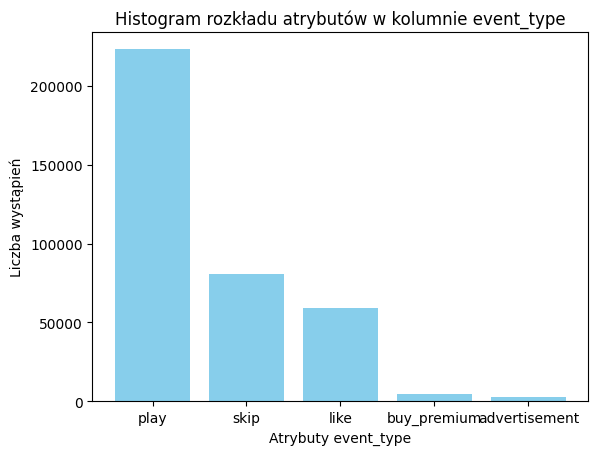

In [11]:
# Rozkład atrybutów w kolumnie event_type
event_type_distribution = sessions_df['event_type'].value_counts()

# Tworzenie histogramu
plt.bar(event_type_distribution.index, event_type_distribution.values, color='skyblue')
plt.title('Histogram rozkładu atrybutów w kolumnie event_type')
plt.xlabel('Atrybuty event_type')
plt.ylabel('Liczba wystąpień')
plt.show()

## Tabela track_storage

In [12]:
track_storage_df.head()

,track_id,storage_class,daily_cost
0,6C0WWu7RYKbAgWUI3YC0sT,slow,0.012479
1,4q7EBRq8ncztC2PRmEC7Fy,slow,0.012737
2,7cNyONpVADZVrW9xe3qq4z,slow,0.013967
3,1bKRTzTFz7wHMxpgZSuPR1,slow,0.009685
4,56OEjuyZ3AROnv4aR1XqhD,slow,0.009106


In [13]:
track_storage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129648 entries, 0 to 129647
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   track_id       129648 non-null  object 
 1   storage_class  129648 non-null  object 
 2   daily_cost     129648 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.0+ MB


In [14]:
track_storage_df.isnull().sum()

track_id         0
storage_class    0
daily_cost       0
dtype: int64

Tabela track_storage nie zmieniła się w porównaniu z poprzednią wersją.

## Tabela tracks

In [15]:
tracks_df.head()

,id,name,popularity,duration_ms,explicit,id_artist,release_date,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6C0WWu7RYKbAgWUI3YC0sT,Voglio farti un regalo,40.0,249573,1,7u710e44HW3K7A5eTnRqHC,2004-09-01,0.727,0.6630,4,0.0,-4.818,0.2770,0.08010,0.000000,0.119,0.633,97.865,4
1,None,My Love - Live / Remastered,34.0,254733,0,3sFhA6G1N0gG1pszb6kk1m,1976-12-10,0.444,0.3480,5,1.0,-12.729,0.0321,0.65600,0.003740,0.956,0.284,116.685,4
2,7cNyONpVADZVrW9xe3qq4z,Heroes of Sand,45.0,279347,0,7IAXZaLTb6nkJr8RmVPn5y,2001,0.273,0.8990,6,1.0,-5.131,0.0499,0.00177,0.000006,0.128,0.301,159.872,3
3,1bKRTzTFz7wHMxpgZSuPR1,Shine on Harvest Moon,6.0,193707,0,5bOsFzuJ6QZMr86ezC4oXY,1961-10-15,0.628,0.0616,0,1.0,-24.973,0.0558,0.78400,0.000009,0.172,0.340,85.012,4
4,56OEjuyZ3AROnv4aR1XqhD,男子漢,19.0,182120,0,6zJ7WZkyTNmB1bFdmHH2k9,1970-01-11,0.353,0.0663,8,0.0,-24.915,0.0445,0.95800,0.000446,0.241,0.317,100.041,4


In [16]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129648 entries, 0 to 129647
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                123225 non-null  object 
 1   name              123165 non-null  object 
 2   popularity        123103 non-null  float64
 3   duration_ms       129648 non-null  int64  
 4   explicit          129648 non-null  int64  
 5   id_artist         123030 non-null  object 
 6   release_date      129648 non-null  object 
 7   danceability      129648 non-null  float64
 8   energy            129648 non-null  float64
 9   key               129648 non-null  int64  
 10  mode              25929 non-null   float64
 11  loudness          129648 non-null  float64
 12  speechiness       129648 non-null  float64
 13  acousticness      129648 non-null  float64
 14  instrumentalness  129648 non-null  float64
 15  liveness          129648 non-null  float64
 16  valence           12

### Brakujące wartości

In [17]:
tracks_df.isnull().sum()

id                    6423
name                  6483
popularity            6545
duration_ms              0
explicit                 0
id_artist             6618
release_date             0
danceability             0
energy                   0
key                      0
mode                103719
loudness                 0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
dtype: int64

### Rozkład atrybutów

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'explicit'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>, <Axes: >]],
      dtype=object)

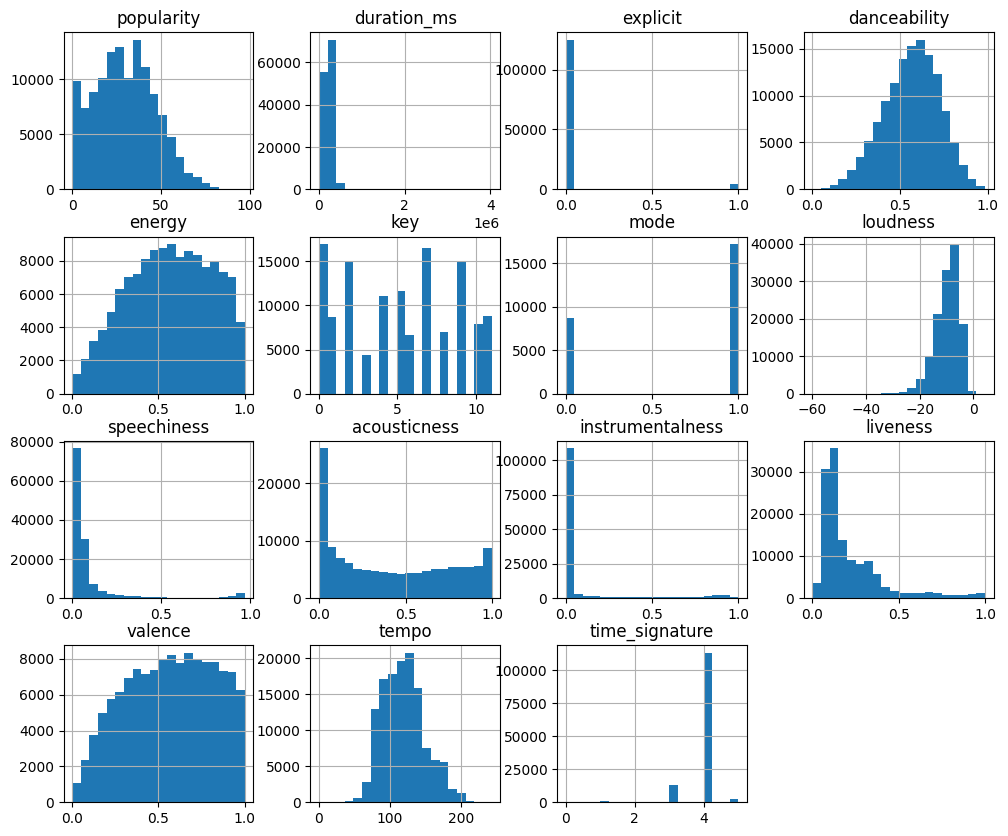

In [18]:
tracks_df.hist(figsize=(12,10), bins=20)

## Tabela users

In [19]:
users_df.head()

,user_id,name,city,street,favourite_genres,premium_user,id
0,101,Maurycy Lejk,Wrocław,al. Powstańców Śląskich 04,"[regional mexican, blues rock, dance pop]",True,NaN
1,102,Julian Rohde,Kraków,al. Rataja 793,"[classic rock, dance pop, argentine rock]",None,NaN
2,103,Jerzy Żelazo,Kraków,pl. Orzechowa 509,"[pop rock, new wave, new romantic]",None,NaN
3,104,Ada Mazanek,Warszawa,pl. Zacisze 78/30,"[new romantic, alternative rock, c-pop]",True,NaN
4,105,Ernest Kukieła,Warszawa,al. Orla 40,"[country rock, metal, mpb]",True,-1.0


In [20]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           5000 non-null   int64  
 1   name              5000 non-null   object 
 2   city              5000 non-null   object 
 3   street            5000 non-null   object 
 4   favourite_genres  4738 non-null   object 
 5   premium_user      4759 non-null   object 
 6   id                272 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 273.6+ KB


### Brakujące wartości

In [21]:
users_df.isnull().sum()

user_id                0
name                   0
city                   0
street                 0
favourite_genres     262
premium_user         241
id                  4728
dtype: int64

### Rozkład atrybutów

In [22]:
users_df['premium_user'].value_counts()

premium_user
True     4758
False       1
Name: count, dtype: int64

Posiadamy tylko jednego użytkownika który nie jest użytkownikiem premium oraz 241 nulli. 

In [23]:
users_df['city'].unique()

array(['Wrocław', 'Kraków', 'Warszawa', 'Gdynia', 'Poznań', 'Szczecin',
       'Radom'], dtype=object)

Posiadamy dane użytkowników tylko z 7 miejscowości. Każda z nich jest dużym miastem.

## Wnioski

* dane użytkowników są bardzo niezbalansowane, prawie wszyscy użytkownicy są premium
* wiele artystów ma atrybut id=-1
* błędy w tabeli sessions (null w kolumnie track_id)
* w tabeli users istnieje id oraz user_id